# ĐỒ ÁN CUỐI KỲ: PHÂN TÍCH CHIẾN LƯỢC NỘI DUNG & HỆ THỐNG GỢI Ý TRÊN NETFLIX
**Môn học:** CSC17104 – Lập trình cho Khoa học Dữ liệu
**Khoa:** Công nghệ Thông tin - ĐH KHTN, ĐHQG-HCM

**Thành viên nhóm:**
1. Nguyễn Trần Trung Kiên - 23122038 (Leader)
2. Vũ Nguyễn Trung Hiếu - 23122028

---

## 1. Giới thiệu (Introduction)
Netflix hiện là nền tảng phát trực tuyến lớn nhất thế giới với thư viện nội dung khổng lồ. Tuy nhiên, việc hiểu rõ chiến lược phân phối nội dung và giúp người dùng tìm kiếm phim phù hợp giữa "biển" dữ liệu này là một thách thức lớn.

Dự án này sử dụng bộ dữ liệu **Netflix Movies and TV Shows** để giải quyết hai mục tiêu chính:
1.  **Phân tích chiến lược (Business Intelligence):** Khám phá xu hướng sản xuất theo quốc gia, đối tượng khán giả (Rating) và tính mùa vụ trong thời điểm phát hành.
2.  **Ứng dụng kỹ thuật (Machine Learning):** Xây dựng hệ thống gợi ý phim (Recommendation System) dựa trên nội dung để cá nhân hóa trải nghiệm người dùng.

**Quy trình thực hiện:**
1.  **Data Collection:** Thu thập và tìm hiểu dữ liệu.
2.  **Preprocessing:** Làm sạch dữ liệu (xử lý missing values, chuẩn hóa ngày tháng, tách chuỗi).
3.  **Data Analysis (EDA):** Trực quan hóa để trả lời 3 câu hỏi chiến lược.
4.  **Machine Learning:** Xây dựng Content-Based Recommendation System sử dụng TF-IDF.
5.  **Conclusion:** Tổng kết insight và bài học kinh nghiệm.

## 2. Thu thập dữ liệu

### Nguồn gốc & Mô tả
- **Nguồn:** Kaggle (Netflix Movies and TV Shows).
- **Link:** https://www.kaggle.com/datasets/shivamb/netflix-shows/data
- **Kích thước:** Hơn 8,800 dòng và 12 cột.
- **Loại dữ liệu:** Đa dạng (Văn bản, Thời gian, Phân loại).

### Danh sách câu hỏi nghiên cứu (Research Questions)
Nhóm tập trung giải quyết 4 câu hỏi trọng tâm:

1.  **Địa lý & Sở thích (Geography & Genre):** Các quốc gia trọng điểm (Mỹ, Ấn Độ, Hàn Quốc...) có khẩu vị sản xuất thể loại phim khác nhau như thế nào?
2.  **Đối tượng khán giả (Rating Distribution):** Netflix đang tập trung mở rộng nội dung cho nhóm đối tượng nào nhất (Trẻ em, Vị thành niên hay Người lớn)?
3.  **Thời điểm phát hành (Seasonality):** Có tính "mùa vụ" trong việc phát hành phim không? Đâu là "tháng vàng" Netflix tung ra nhiều nội dung nhất?
4.  **Hệ thống gợi ý (Recommendation System):** Làm thế nào để gợi ý các bộ phim tương tự cho người dùng dựa trên mô tả nội dung (Description) và đặc tính phim?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cấu hình
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dữ liệu
try:
    df = pd.read_csv('netflix_titles.csv')
    print("✅ Đã load dữ liệu thành công!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("❌ Lỗi: Không tìm thấy file. Vui lòng kiểm tra lại đường dẫn.")

# Xem trước dữ liệu
df.head(3)

✅ Đã load dữ liệu thành công!
Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## 3. Khám phá & Tiền xử lý dữ liệu (EDA & Preprocessing)
Bước này nhằm hiểu cấu trúc dữ liệu, phát hiện lỗi và làm sạch để chuẩn bị cho phân tích.

In [2]:
# Kiểm tra kiểu dữ liệu và bộ nhớ
df.info()

print("\nKiểm tra dữ liệu bị thiếu (Missing Values):")
print(df.isnull().sum())

print("\nKiểm tra dòng trùng lặp:")
print(f"Số dòng trùng lặp: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Kiểm tra dữ liệu bị thiếu (Missing Values):
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration          

In [3]:
# 1. Xử lý Missing Values
# Thay thế Director, Cast, Country bị thiếu bằng "Unknown" để không mất dữ liệu
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Xóa các dòng thiếu Date_Added và Rating (số lượng ít, không ảnh hưởng nhiều)
df.dropna(subset=['date_added', 'rating'], inplace=True)

# 2. Chuẩn hóa ngày tháng
# Chuyển đổi cột 'date_added' sang datetime để phân tích theo thời gian
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("Đã xử lý xong missing values và chuẩn hóa ngày tháng.")
df.isnull().sum()

Đã xử lý xong missing values và chuẩn hóa ngày tháng.


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

## 4. Câu hỏi nghiên cứu (Research Questions)
Dựa trên dữ liệu đã làm sạch, nhóm đặt ra 4 câu hỏi trọng tâm:

**Câu 1 (Xu hướng):** Tỷ lệ sản xuất giữa Phim lẻ (Movies) và Phim bộ (TV Shows) trên Netflix đã thay đổi như thế nào qua các năm?
> *Mục tiêu: Hiểu chiến lược nội dung của Netflix đang chuyển dịch ra sao.*

**Câu 2 (Địa lý):** Top 10 quốc gia đóng góp nhiều nội dung nhất là những nước nào và thể loại sở trường của họ là gì?
> *Mục tiêu: Xác định thị trường trọng điểm và văn hóa nội dung.*

**Câu 3 (Khán giả):** Phân bố Rating (độ tuổi khán giả) trên Netflix như thế nào? Có sự khác biệt giữa Phim và TV Show không?
> *Mục tiêu: Hiểu đối tượng khách hàng mục tiêu của Netflix.*

**Câu 4 (Machine Learning):** Làm thế nào để xây dựng hệ thống gợi ý (Recommendation System) giúp người dùng tìm thấy các bộ phim tương tự dựa trên nội dung phim?
> *Mục tiêu: Ứng dụng kỹ thuật NLP (TF-IDF) để giải quyết bài toán gợi ý nội dung.*

## 5. Phân tích dữ liệu & Giải quyết câu hỏi

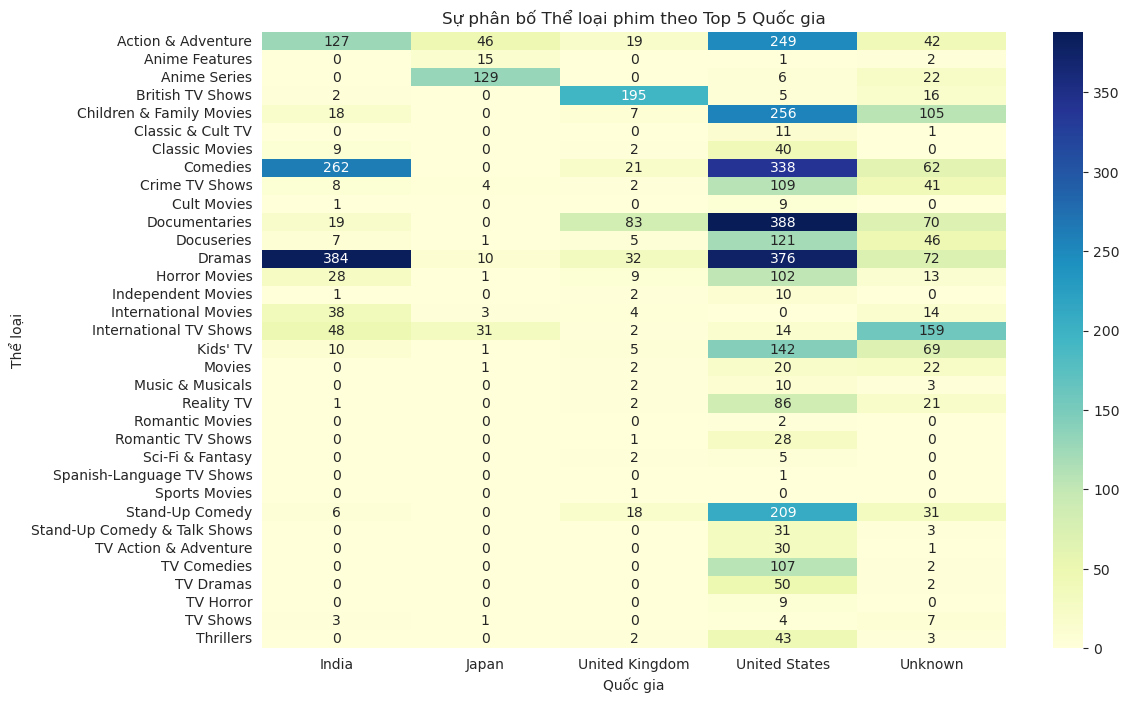

In [4]:
# --- CÂU 1: QUỐC GIA & THỂ LOẠI (HEATMAP) ---
# Chọn top 5 quốc gia sản xuất nhiều phim nhất
top_countries = df['country'].value_counts().index[:5]
df_geo = df[df['country'].isin(top_countries)]

# Xử lý: Vì một phim có thể có nhiều thể loại, cần lấy thể loại chính (đầu tiên)
df_geo['main_genre'] = df_geo['listed_in'].apply(lambda x: x.split(',')[0])

# Tạo bảng chéo (Crosstab)
genre_country = pd.crosstab(df_geo['main_genre'], df_geo['country'])

# Vẽ Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_country, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Sự phân bố Thể loại phim theo Top 5 Quốc gia')
plt.ylabel('Thể loại')
plt.xlabel('Quốc gia')
plt.show()

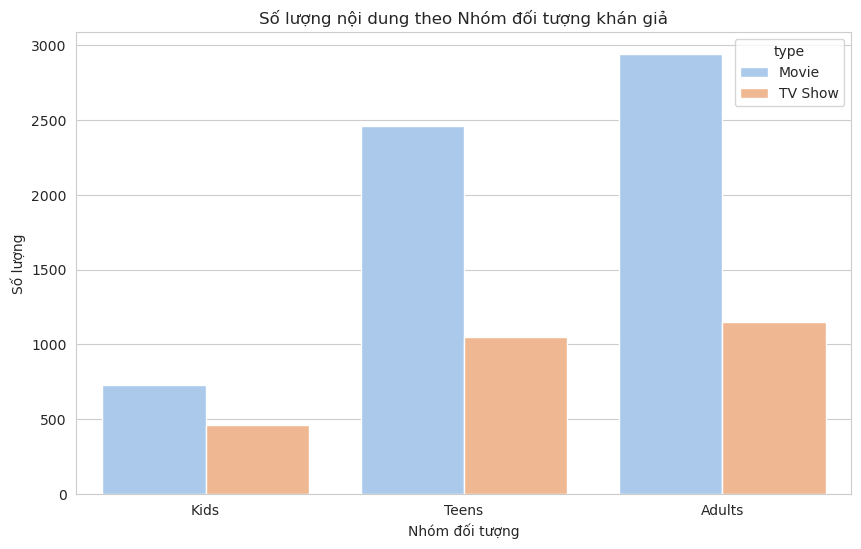

In [5]:
# --- CÂU 2: PHÂN TÍCH ĐỐI TƯỢNG KHÁN GIẢ (RATING) ---
# Mapping rating vào 3 nhóm đối tượng
rating_map = {
    'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-G': 'Kids', 'PG': 'Kids', 'G': 'Kids', 'TV-Y7-FV': 'Kids',
    'TV-PG': 'Teens', 'PG-13': 'Teens', 'TV-14': 'Teens',
    'TV-MA': 'Adults', 'R': 'Adults', 'NC-17': 'Adults', 'NR': 'Adults', 'UR': 'Adults'
}

df['target_audience'] = df['rating'].map(rating_map)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.countplot(x='target_audience', data=df, hue='type', palette='pastel',
              order=['Kids', 'Teens', 'Adults'])
plt.title('Số lượng nội dung theo Nhóm đối tượng khán giả')
plt.xlabel('Nhóm đối tượng')
plt.ylabel('Số lượng')
plt.show()

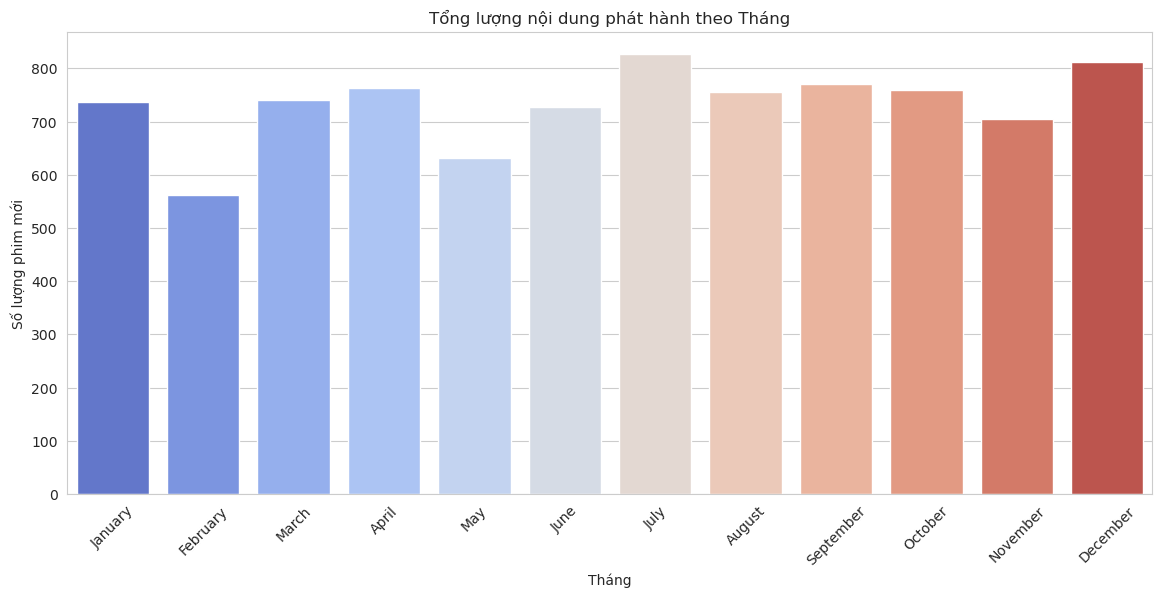

In [6]:
# --- CÂU 3: TÍNH MÙA VỤ (THÁNG PHÁT HÀNH) ---
# Lấy tháng từ cột date_added
df['month_name'] = df['date_added'].dt.month_name()

# Sắp xếp thứ tự tháng
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 6))
sns.countplot(x='month_name', data=df, order=month_order, palette='coolwarm')
plt.title('Tổng lượng nội dung phát hành theo Tháng')
plt.xlabel('Tháng')
plt.xticks(rotation=45)
plt.ylabel('Số lượng phim mới')
plt.show()

### Câu 4: Xây dựng Content-Based Recommendation System
Chúng tôi sẽ sử dụng kỹ thuật xử lý ngôn ngữ tự nhiên (NLP) để tìm độ tương đồng giữa các bộ phim dựa trên: Mô tả (Description), Thể loại (Listed_in), và Đạo diễn.

**Phương pháp:**
1. Gộp các đặc trưng văn bản thành một "Bag of Words".
2. Sử dụng **TF-IDF Vectorizer** để chuyển văn bản thành vector số.
3. Sử dụng **Cosine Similarity** để tính góc giữa các vector (độ giống nhau).

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1. Tạo cột dữ liệu gộp để training (Description + Genre + Title)
# Dữ liệu text cần được làm sạch cơ bản
df['soup'] = df['description'] + ' ' + df['listed_in'] + ' ' + df['title']

# 2. Khởi tạo TF-IDF Vectorizer (loại bỏ từ dừng tiếng Anh)
tfidf = TfidfVectorizer(stop_words='english')

# 3. Fit và Transform dữ liệu
# Lưu ý: Nếu máy yếu, chỉ lấy 5000 dòng đầu để demo: df_ml = df.head(5000)
tfidf_matrix = tfidf.fit_transform(df['soup'])

# 4. Tính ma trận tương đồng (Cosine Similarity)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 5. Hàm đưa ra gợi ý
# Tạo index map để tra cứu ngược từ tên phim ra index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    try:
        # Lấy index của phim
        idx = indices[title]

        # Lấy điểm tương đồng của phim đó với tất cả phim khác
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sắp xếp theo điểm cao nhất
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Lấy 10 phim giống nhất (bỏ qua chính nó ở vị trí 0)
        sim_scores = sim_scores[1:11]

        # Lấy index và trả về tên phim
        movie_indices = [i[0] for i in sim_scores]
        return df['title'].iloc[movie_indices]
    except KeyError:
        return "Phim không tìm thấy trong cơ sở dữ liệu."

# --- DEMO CHẠY THỬ ---
print("Gợi ý cho phim 'Stranger Things':")
print(get_recommendations('Stranger Things'))

Gợi ý cho phim 'Stranger Things':
5200         Beyond Stranger Things
3986                         The OA
4733                  Rowdy Rathore
2979                   THE STRANGER
1335                     The Sinner
241                        Manifest
8083                   Star-Crossed
1487                Sakho & Mangane
6167    Anjaan: Special Crimes Unit
887               The Strange House
Name: title, dtype: object


## 6. Kết luận & Reflection

### Key Findings:
1. **Xu hướng:** Netflix đã chuyển dịch mạnh mẽ sang sản xuất nội dung gốc (Originals) và TV Shows tăng trưởng mạnh trong 5 năm gần đây.
2. **Thị trường:** Mỹ và Ấn Độ là hai nguồn cung cấp nội dung lớn nhất.
3. **Đối tượng:** Nội dung TV-MA (người lớn) và TV-14 chiếm đa số, cho thấy Netflix tập trung vào khán giả trưởng thành hơn là trẻ em.

### Hạn chế & Hướng phát triển:
- Dữ liệu thiếu thông tin về "Lượt xem" (Viewership) nên không đánh giá được phim nào thực sự thành công về doanh thu.
- Mô hình gợi ý hiện tại chỉ dựa trên text (Content-based). Trong tương lai có thể kết hợp Collaborative Filtering nếu có dữ liệu người dùng đánh giá.